# Chameleon KVM@TACC Cloud Traces

Chameleon provides an installation of OpenStack Kilo using the KVM virtualization technology at the [KVM@TACC][1] site. For more information about the Chameleon KVM site, please read our [user documentation][2]. 

Chameleon Team has been developed a [trace data structure][3] based on data from OpenStack Nova. In addition, a [software tool][4] has been implemented and used to extract the appropriate data. The Chameleon [KVM@TACC][1] cloud traces are then published on [Science Clouds][4].

In this Jupyter Notebook, we show simple examples of how to download Chameleon KVM cloud traces and analyze the data. 

[1]: https://openstack.tacc.chameleoncloud.org
[2]: https://chameleoncloud.readthedocs.io/en/latest/technical/kvm.html
[3]:https://scienceclouds.org/cloud-traces/cloud-trace-format/
[4]: https://github.com/ChameleonCloud/starcompactor
[5]: http://press3.mcs.anl.gov/scienceclouds/cloud-traces/

## Download Cloud Traces

Download Chameleon KVM@TACC cloud traces from [Science Clouds][1]. 

[1]: http://press3.mcs.anl.gov/scienceclouds/

In [1]:
import datetime
import pandas as pd 

from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

resp = urlopen("http://scienceclouds.org/files/2018/12/Chameleon_KVM_cloud_trace.zip")
zipfile = ZipFile(BytesIO(resp.read()))
# zip contains two file - instance events and machine events
machine_events_df = pd.read_csv(zipfile.open('machine_events.csv'), parse_dates=['EVENT_TIME'])
instance_events_df = pd.read_csv(zipfile.open('instance_events.csv'), parse_dates=['START_TIME', 'FINISH_TIME'])

print("Downloading and reading cloud traces completed successfully!")

In [2]:
# show machine events
machine_events_df.head(10)

,EVENT_TIME,EVENT_TIME_SEC,HOST_NAME (PHYSICAL),RACK,EVENT,VCPU_CAPACITY,MEMORY_CAPACITY_MB,DISK_CAPACITY_GB
0,2015-11-05 05:05:01,4251901.0,d99a3d1c0af903877c7374a1845f8859,1,ENABLE,48,128536,156336
1,2017-07-31 00:12:45,59011965.0,803963824739adc8b8c6d3d4d03b3b0a,2,UPDATE,48,128536,156336
2,2015-10-09 21:32:34,1978354.0,1d659223dcc41970623494c921d38198,2,CREATE,48,128536,156336
3,2015-11-05 05:04:57,4251897.0,37d24a65ac407f6fe8ac883493e02512,2,ENABLE,48,128536,156336
4,2015-11-04 05:04:53,4165493.0,8c8c2bc2c29645f3dfb27ea93f610154,1,DISABLE,48,128536,156336
5,2015-10-09 21:15:46,1977346.0,d114f0a789b6d3d6849840547df945b8,2,CREATE,48,128536,156336
6,2015-11-05 05:05:01,4251901.0,867affe3494a18886e0c1091ebbd8b8b,2,ENABLE,48,128536,156336
7,2017-04-26 04:04:53,50731493.0,11de6245d3e631ff22327793514aa832,0,DISABLE,40,64156,29689
8,2018-01-18 05:05:01,73803901.0,e711f2ed94b2fdb9b2b274af105cfcdc,1,UPDATE,48,128528,156336
9,2015-10-09 21:27:35,1978055.0,872b22df7a9304f65fa85e245ca02979,2,CREATE,48,128536,156336


In [3]:
# show instance events
instance_events_df.head(10)

,INSTANCE_UUID,EVENT,START_TIME,START_SEC,FINISH_TIME,FINISH_SEC,EVENT_DURATION,RESULT,MEMORY_MB,DISK_GB,VCPUS,INSTANCE_NAME,USER_ID,PROJECT_ID,HOST_NAME (PHYSICAL)
0,467af885e36bbb3a656fb8f83f8c91db,compute__do_build_and_run_instance,2015-09-17 18:24:56,66296.0,2015-09-17 18:25:06,66306.0,10.0,Success,512,1,1,2c6824f29872b7ef0729973411589fc6,c358c86043c749283d1c498516e89b9a,54fdd12fff1505c8329c6fc50d4bcebc,40819f1d02e0ce5401227d282b5f58ad
1,84483962a31f776cf481fa56ff4babde,compute__do_build_and_run_instance,2015-09-17 20:25:55,73555.0,2015-09-17 20:25:58,73558.0,3.0,Success,512,1,1,fc5dac6c2f4d2a3223e4d298b3677740,c358c86043c749283d1c498516e89b9a,54fdd12fff1505c8329c6fc50d4bcebc,2412e43489814bc20cb5382e66e4d1f0
2,84483962a31f776cf481fa56ff4babde,compute_terminate_instance,2015-09-17 20:26:19,73579.0,2015-09-17 20:26:19,73579.0,0.0,Success,512,1,1,fc5dac6c2f4d2a3223e4d298b3677740,c358c86043c749283d1c498516e89b9a,54fdd12fff1505c8329c6fc50d4bcebc,2412e43489814bc20cb5382e66e4d1f0
3,974a749513018784b636dd1d6c2f435e,compute__do_build_and_run_instance,2015-09-17 20:26:42,73602.0,2015-09-17 20:28:00,73680.0,78.0,Success,4096,40,2,fc5dac6c2f4d2a3223e4d298b3677740,c358c86043c749283d1c498516e89b9a,54fdd12fff1505c8329c6fc50d4bcebc,2412e43489814bc20cb5382e66e4d1f0
4,6ae938b5e39b74924f9a5a234d6fc8aa,compute__do_build_and_run_instance,2015-09-18 20:41:41,160901.0,2015-09-18 20:41:46,160906.0,5.0,Success,512,1,1,cdeeaab9e1a7158375537018afb215d9,38fb9a0d17479f503be2d51270061280,54fdd12fff1505c8329c6fc50d4bcebc,c8a66d52ecfce75831966c472449e4dc
5,6ae938b5e39b74924f9a5a234d6fc8aa,compute_terminate_instance,2015-09-18 20:53:36,161616.0,2015-09-18 20:53:37,161617.0,1.0,Success,512,1,1,cdeeaab9e1a7158375537018afb215d9,38fb9a0d17479f503be2d51270061280,54fdd12fff1505c8329c6fc50d4bcebc,c8a66d52ecfce75831966c472449e4dc
6,334b1cfe61c72a30619663a4dc44da49,compute__do_build_and_run_instance,2015-09-18 20:53:58,161638.0,2015-09-18 20:54:03,161643.0,5.0,Success,512,1,1,cdeeaab9e1a7158375537018afb215d9,38fb9a0d17479f503be2d51270061280,54fdd12fff1505c8329c6fc50d4bcebc,c8a66d52ecfce75831966c472449e4dc
7,334b1cfe61c72a30619663a4dc44da49,compute_terminate_instance,2015-09-18 20:56:14,161774.0,2015-09-18 20:56:15,161775.0,1.0,Success,512,1,1,cdeeaab9e1a7158375537018afb215d9,38fb9a0d17479f503be2d51270061280,54fdd12fff1505c8329c6fc50d4bcebc,c8a66d52ecfce75831966c472449e4dc
8,892a193b3818f7c9ff48e64c39e100a6,compute__do_build_and_run_instance,2015-09-18 20:56:33,161793.0,2015-09-18 20:56:38,161798.0,5.0,Success,512,1,1,cdeeaab9e1a7158375537018afb215d9,38fb9a0d17479f503be2d51270061280,54fdd12fff1505c8329c6fc50d4bcebc,c8a66d52ecfce75831966c472449e4dc
9,892a193b3818f7c9ff48e64c39e100a6,compute_terminate_instance,2015-09-18 21:01:55,162115.0,2015-09-18 21:01:56,162116.0,1.0,Success,512,1,1,cdeeaab9e1a7158375537018afb215d9,38fb9a0d17479f503be2d51270061280,54fdd12fff1505c8329c6fc50d4bcebc,c8a66d52ecfce75831966c472449e4dc


## Favorite Flavors

In OpenStack, flavors define the compute, memory, and storage capacity of nova computing instances. To put it simply, a flavor is an available hardware configuration for a server. It defines the size of a virtual server that can be launched. [\[1\]][1].

[1]: https://docs.openstack.org/horizon/latest/admin/manage-flavors.html

### Instance flavors available at Chameleon KVM@TACC

In [4]:
flavors = [
    {
        'FLAVOR': 'm1.tiny',
        'VCPUS': 1,
        'DISK_GB': 1,
        'MEMORY_MB': 512
    },
    {
        'FLAVOR': 'm1.small',
        'VCPUS': 1,
        'DISK_GB': 20,
        'MEMORY_MB': 2048
    },
    {
        'FLAVOR': 'm1.medium',
        'VCPUS': 2,
        'DISK_GB': 40,
        'MEMORY_MB': 4096
    },
    {
        'FLAVOR': 'storage.medium',
        'VCPUS': 1,
        'DISK_GB': 2048,
        'MEMORY_MB': 4096
    },
    {
        'FLAVOR': 'm1.large',
        'VCPUS': 4,
        'DISK_GB': 80,
        'MEMORY_MB': 8192
    },
    {
        'FLAVOR': 'm1.xlarge',
        'VCPUS': 8,
        'DISK_GB': 160,
        'MEMORY_MB': 16384
    },
    {
        'FLAVOR': 'm1.xxlarge',
        'VCPUS': 8,
        'DISK_GB': 160,
        'MEMORY_MB': 32768
    },
    {
        'FLAVOR': 'm1.xxxlarge',
        'VCPUS': 16,
        'DISK_GB': 160,
        'MEMORY_MB': 32768
    }
]
flavors_df = pd.DataFrame(flavors)[['FLAVOR', 'VCPUS', 'MEMORY_MB', 'DISK_GB']]
flavors_df

,FLAVOR,VCPUS,MEMORY_MB,DISK_GB
0,m1.tiny,1,512,1
1,m1.small,1,2048,20
2,m1.medium,2,4096,40
3,storage.medium,1,4096,2048
4,m1.large,4,8192,80
5,m1.xlarge,8,16384,160
6,m1.xxlarge,8,32768,160
7,m1.xxxlarge,16,32768,160


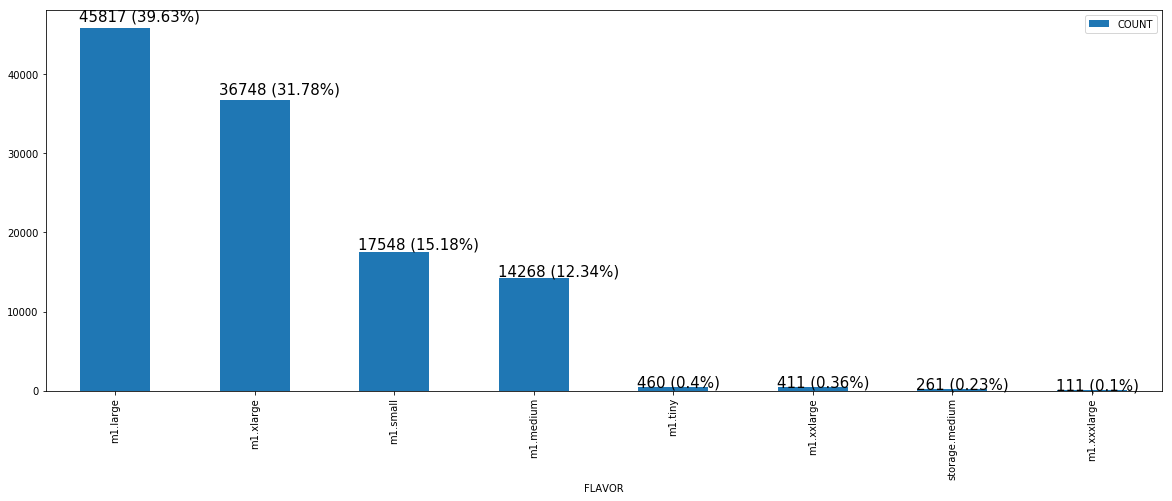

In [6]:
import matplotlib.pyplot as plt

# function for plotting KVM type
def plot_bar_percent(df, figsize, fontsize):
    ax = df.plot(kind='bar', figsize=figsize)
    
    # create a list to collect the plt.patches data
    totals = []
    # find the values and append to list
    for i in ax.patches:
        totals.append(i.get_height())

    # set individual bar lables using above list
    total = sum(totals)
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()-.01, i.get_height()*1.02, str(i.get_height()) + ' (' + str(round((i.get_height()/total)*100, 2))+'%)', fontsize=fontsize)
    

kvm_cloud_traces_flavor_df = pd.merge(instance_events_df, flavors_df,  how='left', left_on=['VCPUS','MEMORY_MB','DISK_GB'], right_on = ['VCPUS','MEMORY_MB','DISK_GB'])

instance_type_df = kvm_cloud_traces_flavor_df.groupby('INSTANCE_UUID').first().reset_index()

plot_bar_percent(instance_type_df[['INSTANCE_UUID', 'FLAVOR']].groupby('FLAVOR').size().to_frame('COUNT').sort_values(by=['COUNT'], ascending=False), (20,7), 15)
plt.show()